

Datasets : https://www.kaggle.com/uciml/mushroom-classification

Drive :https://raw.githubusercontent.com/stevani10/csv_sule/master/mushrooms_dataset.csv



In [ ]:
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering 
%matplotlib inline

In [ ]:
import pandas as pd
import csv
train = pd.read_csv("https://raw.githubusercontent.com/stevani10/csv_sule/master/mushrooms_dataset.csv")
train1 = pd.read_csv("https://raw.githubusercontent.com/stevani10/csv_sule/master/mushrooms_dataset.csv")
print(train.head)


<bound method NDFrame.head of      class cap-shape cap-surface  ... spore-print-color population habitat
0        p         x           s  ...                 k          s       u
1        e         x           s  ...                 n          n       g
2        e         b           s  ...                 n          n       m
3        p         x           y  ...                 k          s       u
4        e         x           s  ...                 n          a       g
...    ...       ...         ...  ...               ...        ...     ...
8119     e         k           s  ...                 b          c       l
8120     e         x           s  ...                 b          v       l
8121     e         f           s  ...                 b          c       l
8122     p         k           y  ...                 w          v       l
8123     e         x           s  ...                 o          c       l

[8124 rows x 23 columns]>


In [ ]:
X = train.drop(['class'], 1)
y =train['class']
X1 = train1.drop(['class'], 1)
y1 =train1['class']

In [ ]:
X = pd.get_dummies(X)
X1 = pd.get_dummies(X1)

In [ ]:
print(X,20)

      cap-shape_b  cap-shape_c  cap-shape_f  ...  habitat_p  habitat_u  habitat_w
0               0            0            0  ...          0          1          0
1               0            0            0  ...          0          0          0
2               1            0            0  ...          0          0          0
3               0            0            0  ...          0          1          0
4               0            0            0  ...          0          0          0
...           ...          ...          ...  ...        ...        ...        ...
8119            0            0            0  ...          0          0          0
8120            0            0            0  ...          0          0          0
8121            0            0            1  ...          0          0          0
8122            0            0            0  ...          0          0          0
8123            0            0            0  ...          0          0          0

[8124 rows x 11

In [ ]:
X.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_b,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_f,bruises_t,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_a,gill-attachment_f,gill-spacing_c,gill-spacing_w,gill-size_b,gill-size_n,gill-color_b,gill-color_e,gill-color_g,...,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-type_p,veil-color_n,veil-color_o,veil-color_w,veil-color_y,ring-number_n,ring-number_o,ring-number_t,ring-type_e,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_b,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_a,population_c,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
kmeans = KMeans(n_clusters=2, random_state=None)
kmeans.fit(X)



KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
clusters = kmeans.predict(X)

In [ ]:
cluster_df = pd.DataFrame()
cluster_df['cluster'] = clusters
cluster_df['class'] = y

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


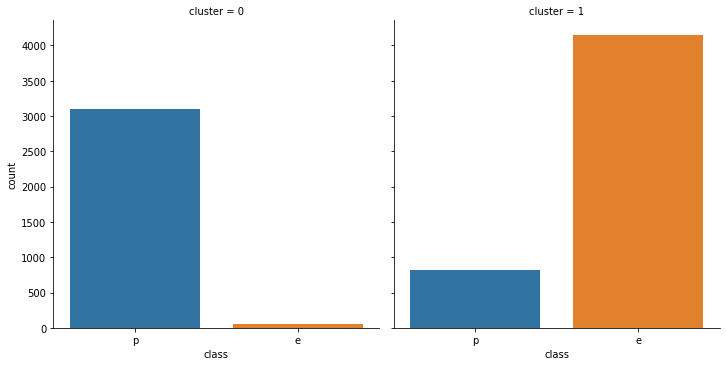

In [ ]:
sns.factorplot(col='cluster', y=None, x='class', data=cluster_df, kind='count')

In [ ]:
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage ='ward')
hc.fit(X1)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=2)

In [ ]:
clusterr = hc.fit_predict(X1)

In [ ]:
cluster_df1 = pd.DataFrame()
cluster_df1['cluster'] = clusterr
cluster_df1['class'] = y1

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


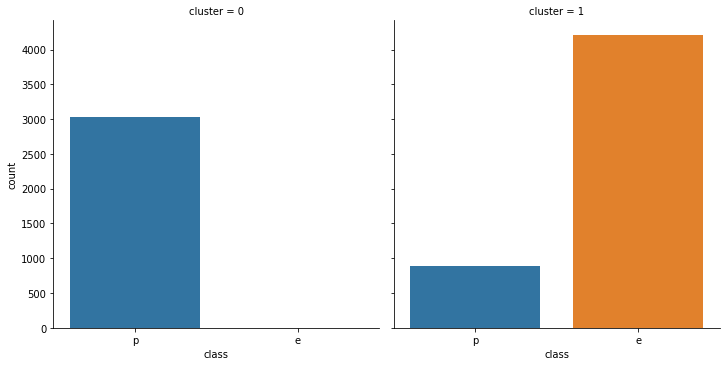

In [ ]:
sns.factorplot(col='cluster', y=None, x='class', data=cluster_df1, kind='count')

In [ ]:
    clusterer = KMeans(n_clusters=2)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For K-means, n_clusters =", 2,
          "The average silhouette_score is :", silhouette_avg)
    

For K-means, n_clusters = 2 The average silhouette_score is : 0.16223992558489375


In [ ]:
    clusterer = AgglomerativeClustering(n_clusters=2)
    cluster_labels = clusterer.fit_predict(X1)
    silhouette_avg = silhouette_score(X1, cluster_labels)
    print("For Agglomerative,n_clusters =", 2,
          "The average silhouette_score is :", silhouette_avg)
    

For Agglomerative,n_clusters = 2 The average silhouette_score is : 0.15981490309372728
